In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


#img=mpimg.imread('/content/drive/My Drive/mask/IMG_0581.JPG')
#imgplot = plt.imshow(img)
#print(img)

import os
from os import listdir


mask_path = '/content/drive/My Drive/mask/';
mask_images = []
for img in os.listdir(mask_path):
  #print(img)
  #plt.figure()
  #imgplot = plt.imshow(mpimg.imread(mask_path + img))
  mask_images.append(cv2.rotate(cv2.resize(mpimg.imread(mask_path + img), (300, 300)), cv2.cv2.ROTATE_90_CLOCKWISE))




mask_images = np.array(mask_images)
#print(mask_images)

nomask_path = '/content/drive/My Drive/NoMask/';
nomask_images = []
for img in os.listdir(nomask_path):
  #print(img)
  #plt.figure()
  #imgplot = plt.imshow(mpimg.imread(nomask_path + img))
  nomask_images.append(cv2.rotate(cv2.resize(mpimg.imread(nomask_path + img), (300, 300)), cv2.cv2.ROTATE_90_CLOCKWISE))

print("imports complete")

nomask_images = np.array(nomask_images)
#print(nomask_images)

mask_images = mask_images/255.0
nomask_images = nomask_images/255.0

print(mask_images.shape)
print(nomask_images.shape)







imports complete
(152, 300, 300, 3)
(151, 300, 300, 3)


In [3]:
labels = []
for img in mask_images:
  labels.append([1])
for img in nomask_images:
  labels.append([0])

images = np.append(mask_images, nomask_images, axis=0)

#print(labels, images.shape)

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.1, random_state=34)

#print(xtrain.shape, len(ytrain), xtest.shape, len(ytest))


ytrain = np.array(ytrain)
ytest = np.array(ytrain)
ytrain = ytrain.astype('float32').reshape((-1,1))
ytest = ytest.astype('float32').reshape((-1,1))



In [4]:
import tensorflow as tf
k = tf.keras
model = k.Sequential()
model.add(k.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(k.layers.MaxPooling2D((2, 2)))
model.add(k.layers.Flatten())
model.add(k.layers.Dense(100, activation='relu'))
model.add(k.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=k.optimizers.SGD(lr=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=3)


Epoch 1/3
9/9 [==============================] - 14s 2s/step - loss: 1.5717 - accuracy: 0.5478
Epoch 2/3
9/9 [==============================] - 14s 2s/step - loss: 0.4446 - accuracy: 0.8493
Epoch 3/3
9/9 [==============================] - 14s 2s/step - loss: 0.8290 - accuracy: 0.6985


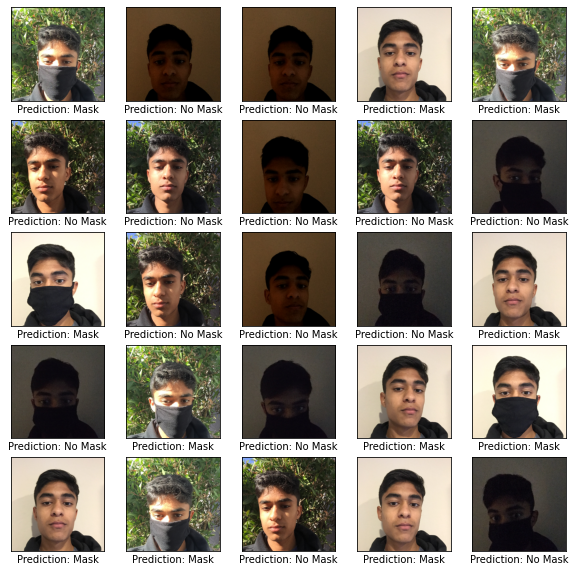

In [5]:



predictions = model.predict(xtest)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtest[i])
    if(round(predictions[i][0]) == 1.0):
      plt.xlabel("Prediction: Mask")
    else:
      plt.xlabel("Prediction: No Mask")
plt.show()



- **50 burst images of both Mask (50 mask)/ No mask (50 no mask)**
- **3 different backgounds/lighting**


IMG_2565.jpg
.ipynb_checkpoints
[[0.48576182]]


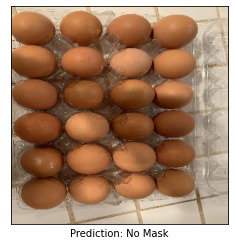

In [7]:
pred_image_path = '/content/preds/'

pred_images = []
for img in os.listdir(pred_image_path):
  print(img)
  #plt.figure()
  #imgplot = plt.imshow(mpimg.imread(mask_path + img))
  if img != '.ipynb_checkpoints':
    image = mpimg.imread(pred_image_path + img)
    image = cv2.resize(image, (300, 300))
    image = cv2.rotate(image, cv2.cv2.ROTATE_90_CLOCKWISE)
    pred_images.append(image)

pred_images = np.array(pred_images)
pred_images = pred_images/255.0

new_predictions = model.predict(pred_images)

for i in range(len(new_predictions)):
  plt.figure()
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(pred_images[i])
  if(round(new_predictions[i][0]) == 1.0):
    plt.xlabel("Prediction: Mask" + " (" + str(new_predictions[i][0]) + ")")
  else:
    plt.xlabel("Prediction: No Mask")
  
print(new_predictions)